In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.colors as pltc
import geopandas
import mapclassify
mpl.rcParams['pdf.fonttype'] = 42

In [34]:
df = pd.read_csv("../data/pnwNP_StatsLocations.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')
df

,site_no,dec_lat_va,dec_long_va,gage,numZero,numOne,startDate,endDate,comid,numObs,propZero,propOne,geometry
0,10361700,41.722116,-119.373258,10361700,2797,3228,1963-10-02,1972-09-29,24061841.0,3285,0.851446,0.982648,POINT (-119.37326 41.72212)
1,10366000,42.072111,-119.962725,10366000,0,61,1950-01-02,1991-10-17,24042897.0,15263,0.000000,0.003997,POINT (-119.96272 42.07211)
2,10378500,42.424883,-119.923285,10378500,0,2405,1950-01-02,1991-09-30,24043081.0,15246,0.000000,0.157746,POINT (-119.92328 42.42488)
3,10387500,42.999869,-120.751093,10387500,8177,8544,1951-06-19,1991-09-29,NaN,14712,0.555805,0.580750,POINT (-120.75109 42.99987)
4,10389500,43.110973,-121.069165,10389500,3131,4183,1965-10-02,1991-09-29,24026288.0,9493,0.329822,0.440640,POINT (-121.06916 43.11097)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14375400,42.031501,-123.737848,14375400,0,10,1985-10-02,1991-09-30,23945187.0,2189,0.000000,0.004568,POINT (-123.73785 42.03150)
614,433247110491701,43.546317,-110.822154,433247110491701,53,53,2008-07-23,2010-11-07,24433125.0,837,0.063321,0.063321,POINT (-110.82215 43.54632)
615,452755122234100,45.465120,-122.395923,452755122234100,4,1007,2013-01-02,2019-10-14,23815490.0,2476,0.001616,0.406704,POINT (-122.39592 45.46512)
616,452807122215001,45.468667,-122.363972,452807122215001,1,817,2015-10-29,2018-10-17,23815474.0,1084,0.000923,0.753690,POINT (-122.36397 45.46867)


In [35]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)


df = geopandas.clip(df, states)

Text(0.5, 1.0, 'Proportion of Zero Flow Readings')

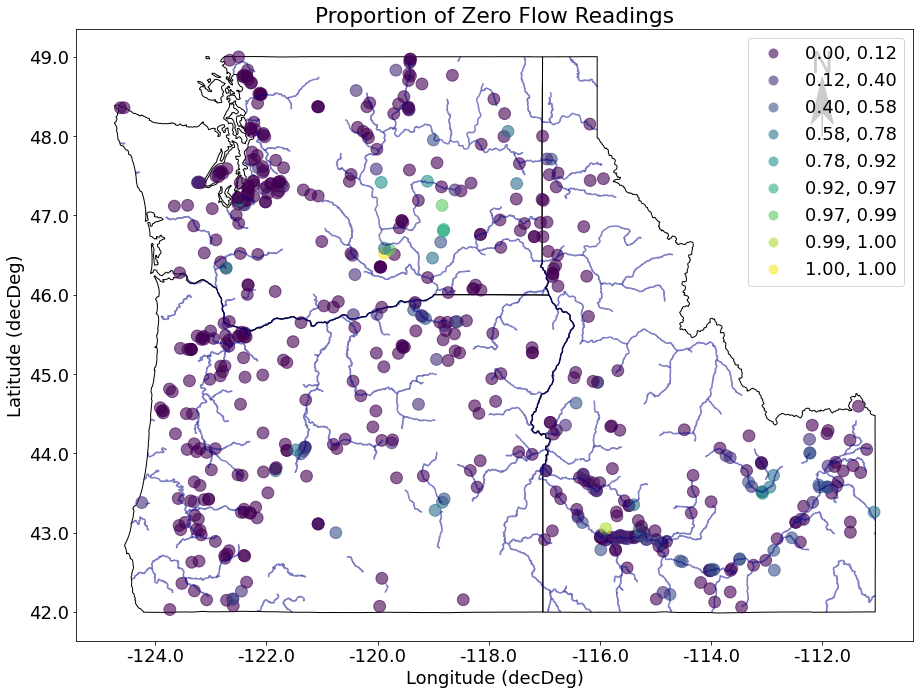

In [38]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

# pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
# tt.plot(ax=ax,markersize=140,color = 'black', alpha = .6)
df.plot(ax=ax,
        markersize=140,
        alpha = .6,
        legend=True,
#         scheme="EqualInterval",
        scheme="HeadTailBreaks",
#         cmap = '',
        column='propZero')

ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of Zero Flow Readings')

# cx.add_basemap(ax ,reset_extent= False,zoom=9,source=cx.providers.OpenStreetMap.Mapnik)

# f.savefig('../docs/Gages2_PNW.png',dpi=600)
# f.savefig('../docs/Gages2_PNW.pdf')

Text(0.5, 1.0, 'Proportion of <1 cfs Readings')

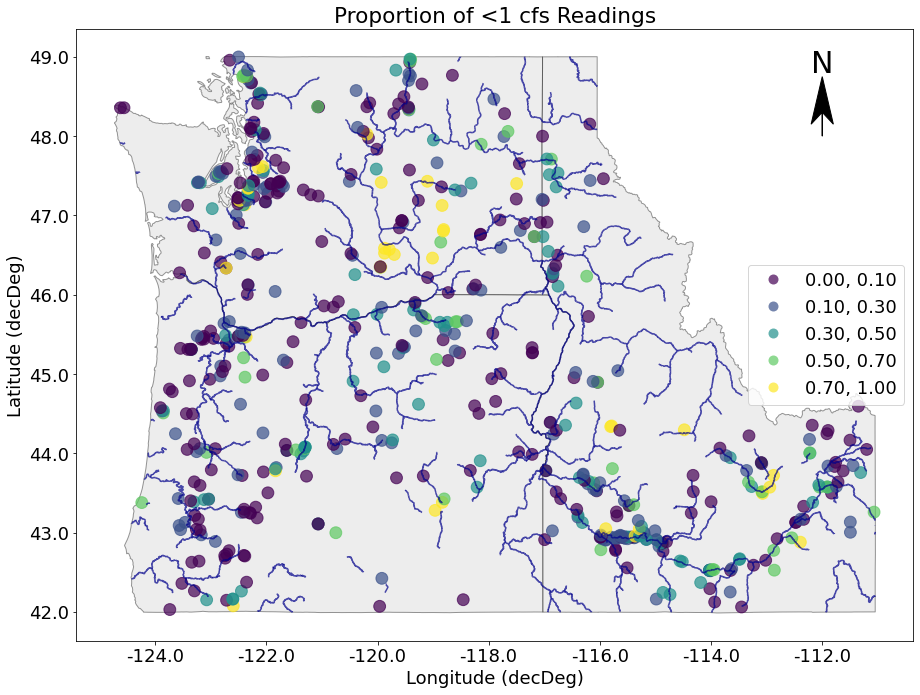

In [70]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

# pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
states.plot(ax=ax,facecolor="lightgrey",edgecolor = "black",alpha=.4)
rivs.plot(ax=ax,
          alpha = .7,
          edgecolor='darkblue')
# tt.plot(ax=ax,markersize=140,color = 'black', alpha = .6)
df.plot(ax=ax,
        markersize=140,
        alpha = .7,
        legend=True,
#         scheme="EqualInterval",
#         scheme="HeadTailBreaks",
        scheme="user_defined", 
        cmap="viridis", 
#         classification_kwds={'bins':[.05,.1,.15,.2,.25, .3, .5, .7]},
        classification_kwds={'bins':[.1,.3, .5, .7]},
        column='propOne')

ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of <1 cfs Readings')


# f.savefig('../docs/Gages2_PNW.png',dpi=600)
# f.savefig('../docs/Gages2_PNW.pdf')